In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [6]:
df=pd.read_csv(r"C:\Users\hayat\Downloads\GoogleStock_Dataset_V2.csv")

In [7]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2013-01-02,17.918339,18.107130,17.846855,18.013729,102033017
1,1,2013-01-03,18.055573,18.229919,17.950716,18.024191,93075567
2,2,2013-01-04,18.165413,18.467529,18.124067,18.380356,110954331
3,3,2013-01-07,18.317591,18.415474,18.196297,18.300158,66476239
4,4,2013-01-08,18.319834,18.338762,18.043119,18.264042,67295297


In [8]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
2770,2770,2024-01-04,139.850006,140.634995,138.009995,138.039993,18253300
2771,2771,2024-01-05,138.352005,138.809998,136.850006,137.389999,15433200
2772,2772,2024-01-08,138.000000,140.639999,137.880005,140.529999,17645300
2773,2773,2024-01-09,140.059998,142.800003,139.789993,142.559998,19579700
2774,2774,2024-01-10,142.520004,144.524994,142.460007,143.800003,16621800


In [9]:
# Remove any duplicate index 
df = df.loc[~df.index.duplicated(keep='first')]

In [10]:
df.shape


(2775, 7)

In [11]:
df


,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2013-01-02,17.918339,18.107130,17.846855,18.013729,102033017
1,1,2013-01-03,18.055573,18.229919,17.950716,18.024191,93075567
2,2,2013-01-04,18.165413,18.467529,18.124067,18.380356,110954331
3,3,2013-01-07,18.317591,18.415474,18.196297,18.300158,66476239
4,4,2013-01-08,18.319834,18.338762,18.043119,18.264042,67295297
...,...,...,...,...,...,...,...
2770,2770,2024-01-04,139.850006,140.634995,138.009995,138.039993,18253300
2771,2771,2024-01-05,138.352005,138.809998,136.850006,137.389999,15433200
2772,2772,2024-01-08,138.000000,140.639999,137.880005,140.529999,17645300
2773,2773,2024-01-09,140.059998,142.800003,139.789993,142.559998,19579700


In [12]:
df.describe()


,Unnamed: 0,Open,High,Low,Close,Volume
count,2775.000000,2775.000000,2775.000000,2775.000000,2775.000000,2.775000e+03
mean,1387.000000,64.913671,65.600115,64.273645,64.952090,3.828731e+07
std,801.217823,38.164394,38.630869,37.753744,38.194190,2.612174e+07
min,0.000000,17.550716,17.567652,17.323069,17.506132,1.584340e+05
25%,693.500000,32.755501,33.153002,32.346251,32.710751,2.356953e+07
50%,1387.000000,54.200001,54.778500,53.616100,54.249500,3.023200e+07
75%,2080.500000,94.466000,96.004997,93.208252,94.619999,4.305293e+07
max,2774.000000,151.863495,152.100006,149.887497,150.709000,4.643901e+08


In [13]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

df=df.dropna()
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())

Null Values: 0
NA values: False


# Analysis of Year 2018

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2018 = df.loc[(df['Date'] >= '2018-01-01')
                     & (df['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Close','Volume']],axis=1)

,Unnamed: 0,Date,Open,High,Low
1259,1259,2018-01-02,52.417000,53.347000,52.261501
1260,1260,2018-01-03,53.215500,54.314499,53.160500
1261,1261,2018-01-04,54.400002,54.678501,54.200100
1262,1262,2018-01-05,54.700001,55.212502,54.599998
1263,1263,2018-01-08,55.111500,55.563499,55.081001
...,...,...,...,...,...
1505,1505,2018-12-24,48.695000,50.176998,48.505501
1506,1506,2018-12-26,49.450500,52.000000,49.150002
1507,1507,2018-12-27,50.857498,52.194500,49.849998
1508,1508,2018-12-28,52.480999,52.778000,51.654999


In [15]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,56.360048,56.538524
February,54.431474,54.410343
March,54.805405,54.574524
April,51.920762,51.784809
May,53.201068,53.463796
June,56.819810,56.881333
July,59.173214,59.379524
August,61.307848,61.283587
September,58.843921,58.790447


In [16]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Google Stock open and close price')
fig.show()

In [17]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Google Stock price')
fig.show()

In [18]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'], 
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Google Stock analysis chart', font_size=15, font_color='black',legend_title_text='Google Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2019

In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2019 = df.loc[(df['Date'] >= '2019-01-01')
                     & (df['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Close','Volume']],axis=1)

,Unnamed: 0,Date,Open,High,Low
1510,1510,2019-01-02,50.828499,52.616001,50.785500
1511,1511,2019-01-03,52.049999,52.848999,50.703499
1512,1512,2019-01-04,51.629501,53.542000,51.370899
1513,1513,2019-01-07,53.575001,53.700001,52.737999
1514,1514,2019-01-08,53.805500,54.228001,53.026501
...,...,...,...,...,...
1757,1757,2019-12-24,67.425003,67.513000,67.139000
1758,1758,2019-12-26,67.308502,68.066353,67.223503
1759,1759,2019-12-27,68.149498,68.226501,67.465500
1760,1760,2019-12-30,67.500000,67.650002,66.700996


In [20]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,53.471119,53.613214
February,55.629552,55.712105
March,58.850749,58.959881
April,61.155024,61.311310
May,57.515432,57.538159
June,54.201350,54.056125
July,57.466614,57.603841
August,59.065091,59.034341
September,60.879950,61.041975


In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Google Stock open and close price')
fig.show()

In [22]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Google Stock price')
fig.show()


In [23]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Google Stock analysis chart', font_size=15, font_color='black',legend_title_text='Google Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2020


In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2020 = df.loc[(df['Date'] >= '2020-01-01')
                     & (df['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Close','Volume']],axis=1)

,Unnamed: 0,Date,Open,High,Low
1762,1762,2020-01-02,67.077499,68.406998,67.077499
1763,1763,2020-01-03,67.392998,68.625000,67.277199
1764,1764,2020-01-06,67.500000,69.824997,67.500000
1765,1765,2020-01-07,69.897003,70.149498,69.518997
1766,1766,2020-01-08,69.603996,70.579002,69.542000
...,...,...,...,...,...
2010,2010,2020-12-24,86.750000,87.300003,86.455498
2011,2011,2020-12-28,87.581749,89.536400,87.316750
2012,2012,2020-12-29,89.389503,89.622002,87.804497
2013,2013,2020-12-30,88.100502,88.254753,86.279999


In [25]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,71.633977,71.832691
February,73.139289,73.205526
March,59.166546,59.419705
April,61.748131,61.707023
May,68.860594,69.055687
June,71.503227,71.552386
July,75.449638,75.678659
August,76.974309,77.297239
September,76.334772,75.927690


In [26]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Google Stock open and close price')
fig.show()

In [27]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Google Stock price')
fig.show()

In [28]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'], 
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Google Stock analysis chart', font_size=15, font_color='black',legend_title_text='Google Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2021

In [29]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2021 = df.loc[(df['Date'] >= '2021-01-01')
                     & (df['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Close','Volume']],axis=1)

,Unnamed: 0,Date,Open,High,Low
2015,2015,2021-01-04,87.876999,88.032501,85.392502
2016,2016,2021-01-05,86.250000,87.383499,85.900749
2017,2017,2021-01-06,85.131500,87.400002,84.949997
2018,2018,2021-01-07,87.002998,89.419998,86.852501
2019,2019,2021-01-08,89.399002,90.491997,88.676750
...,...,...,...,...,...
2261,2261,2021-12-23,147.089493,148.572601,146.950851
2262,2262,2021-12-27,147.463501,148.426498,147.250000
2263,2263,2021-12-28,148.374496,148.374496,145.935501
2264,2264,2021-12-29,146.429504,147.183746,145.504501


In [30]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,90.113500,90.419185
February,103.005974,103.417842
March,103.056392,102.992240
April,114.182751,114.492119
May,117.590727,117.629776
June,124.912230,125.069705
July,132.095374,132.339284
August,138.820068,139.320342
September,142.385136,141.881905


In [31]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Google Stock open and close price')
fig.show()

In [32]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Google Stock price')
fig.show()

In [33]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'], 
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Google Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2022

In [36]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2022 = df.loc[(df['Date'] >= '2022-01-01')
                     & (df['Date'] < '2022-12-31')]

y_2022.drop(y_2022[['Close','Volume']],axis=1)

,Unnamed: 0,Date,Open,High,Low
2267,2267,2022-01-03,144.475494,145.550003,143.502502
2268,2268,2022-01-04,145.550507,146.610001,143.816147
2269,2269,2022-01-05,144.181000,144.298004,137.523499
2270,2270,2022-01-06,137.497498,139.686005,136.763504
2271,2271,2022-01-07,137.904999,138.254745,135.789001
...,...,...,...,...,...
2513,2513,2022-12-23,87.620003,90.099998,87.620003
2514,2514,2022-12-27,89.309998,89.500000,87.535004
2515,2515,2022-12-28,87.500000,88.519997,86.370003
2516,2516,2022-12-29,87.029999,89.364998,86.989998


In [37]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,136.373150,136.042724
February,137.323105,136.577816
March,135.333098,135.356391
April,129.661474,128.610524
May,113.169976,113.528263
June,112.703512,112.825119
July,112.682900,113.326600
August,117.230435,117.114783
September,104.319286,104.108571


In [38]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Google Stock open and close price')
fig.show()

In [39]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Google Stock price')
fig.show()

In [40]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'], 
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Google Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall Analysis from 2018-2023

In [41]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '2018-01-01')
                     & (df['Date'] <= '2023-12-29')]

y_overall.drop(y_overall[['Close','Volume']],axis=1)

,Unnamed: 0,Date,Open,High,Low
1259,1259,2018-01-02,52.417000,53.347000,52.261501
1260,1260,2018-01-03,53.215500,54.314499,53.160500
1261,1261,2018-01-04,54.400002,54.678501,54.200100
1262,1262,2018-01-05,54.700001,55.212502,54.599998
1263,1263,2018-01-08,55.111500,55.563499,55.081001
...,...,...,...,...,...
2763,2763,2023-12-22,142.130005,143.250000,142.054993
2764,2764,2023-12-26,142.979996,143.945007,142.500000
2765,2765,2023-12-27,142.830002,143.320007,141.050995
2766,2766,2023-12-28,141.850006,142.270004,140.828003


In [42]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,82.946193,83.121410
February,86.701469,86.688763
March,85.894147,86.017478
April,86.798898,86.731959
May,87.395818,87.624022
June,90.932502,91.011292
July,92.594102,92.824698
August,97.682511,97.810728
September,96.918734,96.738275


In [43]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Google Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building LSTM Model

#First Step is Preparing Data for Training and Testing

#Here we are just considering 1 year data for training data

#As we want to predict Close Price of the Google Stock so we are just Considering Close and Date

In [45]:
# Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2775, 2)


In [46]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Google Stock close price 2013-2024', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [47]:
closedf = closedf[closedf['Date'] > '2021-01-31']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  741


In [48]:
closedf

,Date,Close
2034,2021-02-01,95.067497
2035,2021-02-02,96.375504
2036,2021-02-03,103.503502
2037,2021-02-04,103.118500
2038,2021-02-05,104.900002
...,...,...
2770,2024-01-04,138.039993
2771,2024-01-05,137.389999
2772,2024-01-08,140.529999
2773,2024-01-09,142.559998


In [49]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Google Stock close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Normalization
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [51]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(741, 1)


In [52]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (518, 1)
test_data:  (223, 1)


In [53]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [54]:
time_step = 22
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (495, 22)
y_train:  (495,)
X_test:  (200, 22)
y_test (200,)


In [55]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (495, 22, 1)
X_test:  (200, 22, 1)


model=Sequential()

model.add(LSTM(128,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [57]:
# Define the updated LSTM model with L2 regularization in the Dense layers
model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))


In [58]:
# Compile the model with a custom learning rate
initial_learning_rate = 0.001
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * np.exp(-epoch / 100), verbose=1)
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)

earlystopping


In [60]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with Early Stopping

In [61]:
# Train the model with Early Stopping and Learning Rate Scheduler
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=220,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, lr_schedule]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/220
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - loss: 1.1607 - val_loss: 0.9069 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.000990049833749168.
Epoch 2/220
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.8850 - val_loss: 0.7631 - learning_rate: 9.9005e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009801986733067552.
Epoch 3/220
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - loss: 0.7370 - val_loss: 0.6402 - learning_rate: 9.8020e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0009704455335485082.
Epoch 4/220
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.6142 - val_loss: 0.5306 - learning_rate: 9.7045e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0009607894391523232.
Epoch 5/220
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.5119 - val_loss: 0.4405 - learning_rate: 9.6079e-04

Epoch 6: LearningRateScheduler setting learn

### Plotting Loss vs Validation loss

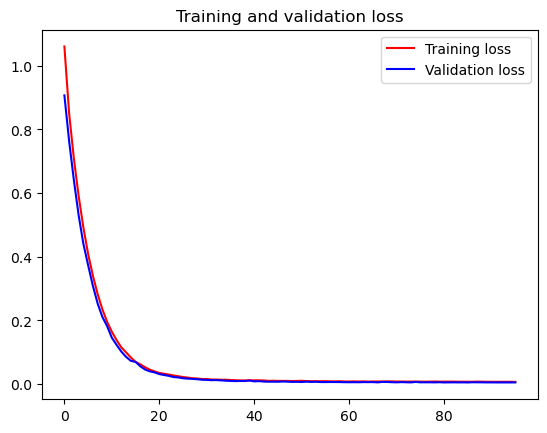

<Figure size 640x480 with 0 Axes>

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [63]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


((495, 1), (200, 1))

# Model Evaluation


In [64]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [65]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  4.373693548622418
Train data MSE:  19.12919525726136
Train data MAE:  3.441980427443379
-------------------------------------------------------------------------------------
Test data RMSE:  3.8208171359147878
Test data MSE:  14.598643586100083
Test data MAE:  2.8080108642578123


## Variance Regression Score


In [67]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9414336656983445
Test data explained variance regression score: 0.8853461183115279


## R square score for regression


In [68]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9403294104188319
Test data R2 score: 0.8853091119710853


## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)


In [69]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0014862805656199077
Test data MGD:  0.000962454534631354
----------------------------------------------------------------------
Train data MPD:  0.16670942659645754
Test data MPD:  0.11798252537705992


# Comparision of original Google Stock close price and predicted close price


In [70]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                                                       plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between Google Stock original close price vs Google Stock predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (741, 1)
Test predicted data:  (741, 1)
